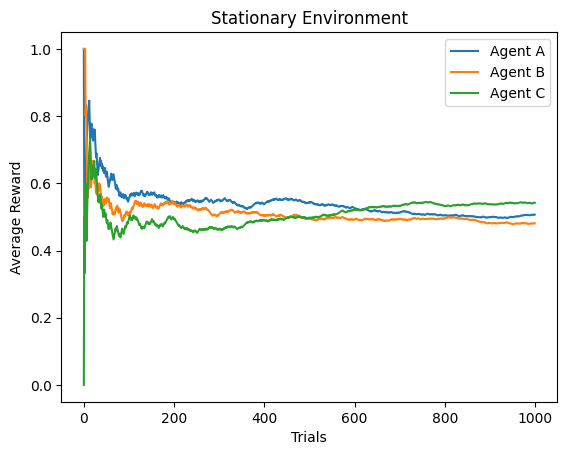

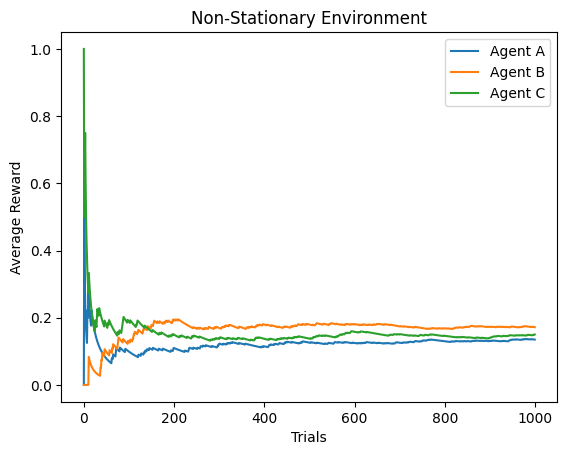

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define the bandit environment
def bandit_environment(arm, is_stationary):
    if is_stationary:
        true_values = np.random.rand(10)  # Example stationary arm values
    else:
        true_values = [0.1 + 0.01 * arm for arm in range(10)]  # Example non-stationary arm values
    return np.random.choice([0, 1], p=[1 - true_values[arm], true_values[arm]])

# Agent (a): Estimating value by averaging all previous rewards for each arm
class AgentA:
    def __init__(self, num_arms, epsilon, decay_factor):
        self.num_arms = num_arms
        self.epsilon = epsilon
        self.decay_factor = decay_factor
        self.q_values = np.zeros(num_arms)
        self.arm_counts = np.zeros(num_arms)

    def choose_arm(self):
        if np.random.rand() < self.epsilon:
            return np.random.choice(self.num_arms)
        return np.argmax(self.q_values)

    def update_values(self, chosen_arm, reward):
        self.arm_counts[chosen_arm] += 1
        self.q_values[chosen_arm] += (reward - self.q_values[chosen_arm]) / self.arm_counts[chosen_arm]

# Agent (b): Estimating value using a fixed update (learning) rate
class AgentB:
    def __init__(self, num_arms, epsilon, decay_factor, alpha):
        self.num_arms = num_arms
        self.epsilon = epsilon
        self.decay_factor = decay_factor
        self.alpha = alpha
        self.q_values = np.zeros(num_arms)
        self.arm_counts = np.zeros(num_arms)

    def choose_arm(self):
        if np.random.rand() < self.epsilon:
            return np.random.choice(self.num_arms)
        return np.argmax(self.q_values)

    def update_values(self, chosen_arm, reward):
        self.q_values[chosen_arm] += self.alpha * (reward - self.q_values[chosen_arm])
        self.arm_counts[chosen_arm] += 1
        self.epsilon *= self.decay_factor  # Decay epsilon for epsilon-greedy agents

# Agent (c): Bernoulli Thompson agent
class AgentC:
    def __init__(self, num_arms):
        self.num_arms = num_arms
        self.successes = np.zeros(num_arms)
        self.failures = np.zeros(num_arms)

    def choose_arm(self):
        theta_samples = np.random.beta(self.successes + 1, self.failures + 1)
        return np.argmax(theta_samples)

    def update_values(self, chosen_arm, reward):
        if reward == 1:
            self.successes[chosen_arm] += 1
        else:
            self.failures[chosen_arm] += 1

# Function to run the bandit for a specified number of trials
def run_bandit(agent, trials, is_stationary=True):
    rewards = []
    for trial in range(trials):
        chosen_arm = agent.choose_arm()
        reward = bandit_environment(chosen_arm, is_stationary)
        agent.update_values(chosen_arm, reward)
        rewards.append(reward)
    return rewards

# Function to plot the learning curves for the agents
def plot_learning_curves(rewards_a, rewards_b, rewards_c, title):
    plt.plot(np.cumsum(rewards_a) / np.arange(1, len(rewards_a) + 1), label='Agent A')
    plt.plot(np.cumsum(rewards_b) / np.arange(1, len(rewards_b) + 1), label='Agent B')
    plt.plot(np.cumsum(rewards_c) / np.arange(1, len(rewards_c) + 1), label='Agent C')
    plt.title(title)
    plt.xlabel('Trials')
    plt.ylabel('Average Reward')
    plt.legend()
    plt.show()

# Set parameters
num_arms = 10
epsilon_a = 0.1
decay_factor_a = 0.99
alpha_b = 0.1
trials = 1000

# Run simulations for each agent in a stationary environment
agent_a = AgentA(num_arms, epsilon_a, decay_factor_a)
agent_b = AgentB(num_arms, epsilon_a, decay_factor_a, alpha_b)
agent_c = AgentC(num_arms)

rewards_a_stationary = run_bandit(agent_a, trials, is_stationary=True)
rewards_b_stationary = run_bandit(agent_b, trials, is_stationary=True)
rewards_c_stationary = run_bandit(agent_c, trials, is_stationary=True)

# Run simulations for each agent in a non-stationary environment
agent_a = AgentA(num_arms, epsilon_a, decay_factor_a)
agent_b = AgentB(num_arms, epsilon_a, decay_factor_a, alpha_b)
agent_c = AgentC(num_arms)

rewards_a_non_stationary = run_bandit(agent_a, trials, is_stationary=False)
rewards_b_non_stationary = run_bandit(agent_b, trials, is_stationary=False)
rewards_c_non_stationary = run_bandit(agent_c, trials, is_stationary=False)

# Plot learning curves for both environments
plot_learning_curves(rewards_a_stationary, rewards_b_stationary, rewards_c_stationary, 'Stationary Environment')
plot_learning_curves(rewards_a_non_stationary, rewards_b_non_stationary, rewards_c_non_stationary, 'Non-Stationary Environment')
